In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import json 
from IPython.core.display import HTML
import spacy

# Metrics

Dataset padrão:

* Teste: 20% 
* Treino: 80%

,epoch,step,score,losses.tok2vec,losses.ner,scores.ents_f,scores.ents_p,scores.ents_r
0,0,0,0.000000,0.000000,114.523821,0.000000,0.000000,0.000000
1,1,200,0.386707,651.501437,7626.836687,38.670695,35.955056,41.830065
2,2,400,0.296412,672.582631,6370.840792,29.641186,28.358209,31.045752
3,4,600,0.448529,1591.485645,7814.238415,44.852941,51.260504,39.869281
4,6,800,0.583596,2468.829098,8047.685705,58.359621,56.402439,60.457516
5,8,1000,0.503106,2110.095852,7816.493617,50.310559,47.928994,52.941176
6,11,1200,0.574639,7402.013234,8112.463416,57.463884,56.466877,58.496732
7,14,1400,0.613518,5530.650101,6258.925031,61.351820,65.313653,57.843137
8,18,1600,0.659375,8166.985384,7406.367315,65.937500,63.173653,68.954248
9,23,1800,0.548043,8834.408967,7572.789117,54.804270,60.156250,50.326797


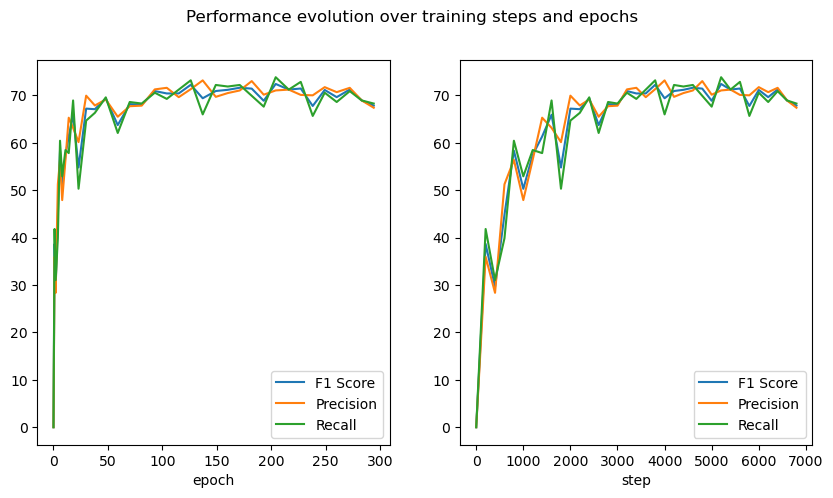

,Precision,Recall,F1
TYPE_OF_APPEAL,0.950000,1.000000,0.974359
SUBJECT,0.617391,0.763441,0.682692
RATIO_DECIDENDI,0.724138,0.661417,0.691358
NOT_HEARD,0.583333,0.875000,0.700000
GRANTED_AND_INDICATED,1.000000,0.200000,0.333333
GRANTED_TO_REVOKE,0.545455,0.545455,0.545455
NOT_ENTERTAINED,0.500000,0.666667,0.571429
NOT_GRANTED,1.000000,0.800000,0.888889
SUSPENDED,0.666667,1.000000,0.800000
RENDERED_MOOT,1.000000,0.714286,0.833333


<Figure size 1000x600 with 0 Axes>

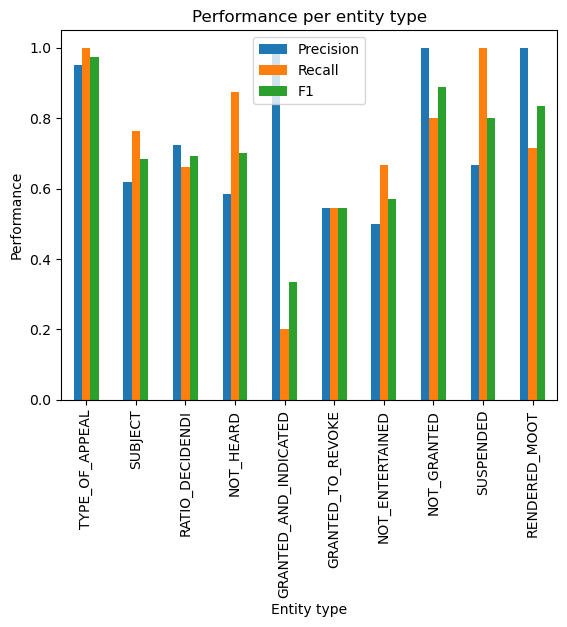

In [5]:

df = pd.read_json(path_or_buf=f'./training_log.jsonl', lines=True, encoding='utf8')

df = pd.concat([df, pd.json_normalize(df["losses"]).add_prefix("losses.")], axis=1)
df = pd.concat([df, pd.json_normalize(df["scores"]).add_prefix("scores.")], axis=1)
df.drop(columns=["losses", "scores"], inplace=True)

display(df)

    # plot
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

df.plot(x="epoch", y=["scores.ents_f", "scores.ents_p", "scores.ents_r"], ax=axes[0])
axes[0].legend(["F1 Score", "Precision", "Recall"])

df.plot(x="step", y=["scores.ents_f", "scores.ents_p", "scores.ents_r"], ax=axes[1])
axes[1].legend(["F1 Score", "Precision", "Recall"])

plt.suptitle("Performance evolution over training steps and epochs")

plt.show()

    # df
df_ents: pd.DataFrame

with open(f'./output/model-best/meta.json') as json_file:
    data = json.load(json_file)
    df_ents = pd.DataFrame(data['performance']['ents_per_type']).T
    df_ents.columns = ["Precision", "Recall", "F1"]

display(df_ents)

# plot
plt.figure(figsize=(10, 6))  # Adjust the figure size if needed
df_ents.plot(kind='bar')
plt.title("Performance per entity type")
plt.xlabel("Entity type")
plt.ylabel("Performance")
plt.show()